<a href="https://colab.research.google.com/github/carolsombrioo/Data-Science/blob/main/Analisando_os_Dados_do_Airbnb_Quebec_Canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# Análise de Dados Exploratórios do Airbnb

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>



## Região de Quebec Canadá
Considerada uma das cidades mais antigas da America do note, localizada no leste do Canada, o nome Quebec foi dado pela primeira vez à cidade em 1608 e derivado de uma palavra algonquiana que significa "onde o rio se estreita". Segundo o jornal Britannica Quebec é a maior da 10 provincias do Canada em área e perde apenas para Ontário em população.

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/qc/quebec-city/2023-07-06/visualisations/listings.csv")

**Dicionário das variáveis**

* id - Número do id para identificar o imóvel
* name - Nome da Propriedade anunciada
* hot_id - Número de id do proprietário da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - Não possui valores válidos
* neighbourhood - Nome do bairro
* latitude - Coordenada da latitude da propriedade
* longitude - Coordenada da longitude da propriedade
* room_type - Informa o tipo de quarto que é oferecido
* price - Preço para alugar o imóvel
* minimum_nights - Quantidade mínima de noites para reservar
* number_of_reviews - Número de reviews que a propriedade possui
* last_review - Data do último review
* reviews_per_month - Quantidade de reviews por mês
* calculated_host_listings_count - Quantidade de imóveis do mesmo anfitrião
* availability_365 - Número de dias de disponibilidade dentro de 365 dias
* number_of_reviews_ltm - Quantidade de avaliações nos últimos 12 meses
* license - Número de registro do imóvel

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,138381,Bed and breakfast in Quebec · ★4.91 · 1 bedroo...,675584,Mary,NaN,Sillery,46.76851,-71.26804,Private room,185,2,175,2022-09-05,1.19,3,337,7,NaN
1,198548,Rental unit in Quebec · ★4.75 · 1 bedroom · 1 ...,960772,Marianne,NaN,Saint-Roch,46.81169,-71.22522,Entire home/apt,150,31,56,2023-03-25,0.39,1,132,3,NaN
2,214967,Townhouse in Quebec · ★4.95 · 1 bedroom · 1 be...,1110010,Julie,NaN,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.80233,-71.21214,Private room,74,32,197,2023-04-15,1.49,1,356,22,NaN
3,348647,Bed and breakfast in Quebec · ★4.74 · 1 bedroo...,1764323,Gilles,NaN,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.81504,-71.20562,Private room,225,1,176,2023-07-03,1.28,2,75,17,NaN
4,361573,Bed and breakfast in Quebec · ★4.78 · 1 bedroo...,1764323,Gilles,NaN,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.81570,-71.20504,Private room,150,1,72,2022-09-18,0.53,2,50,2,125930


## Análise dos Dados


### **Q1. Quantos atributos e quantas entradas o nosso conjunto de dados possui? Quais são os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificando os tipos das variáveis
display(df.dtypes)

Entradas:	 2190
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.281735
reviews_per_month                 0.142922
last_review                       0.142922
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Identificamos que a coluna 'neighbourhood_group' possui 100 % dos seus dados ausentes, então vamos exclui-la. A variável 'license' e 'last_review' também vamos realizar a exclusão, pois não será relevante para a nossa análise.
Já a coluna 'reviews_per_month', pode ser interessante manter em nossa análise e os seus valores nulos são porquê os imóveis ainda não receberam nenhuma nota, então vamos preencher esses dados com 0.




In [ ]:
# excluindo colunas com dados faltantes
df.drop(columns=['neighbourhood_group', 'license','last_review',], inplace=True)

# excluindo entradas com dados faltantes
df.dropna(axis=0, inplace=True)

# convertendo os tipos de dados
df[['price', 'latitude', 'longitude']] = df[['price', 'latitude', 'longitude']].astype('float')

In [ ]:
# vamos preencher os dados de 'reviews_per_month' por 0
df['reviews_per_month'].fillna(0, inplace=True)

In [ ]:
# verificando o resultado
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

### **Q3. Qual o tipo de distribuição das variáveis?**

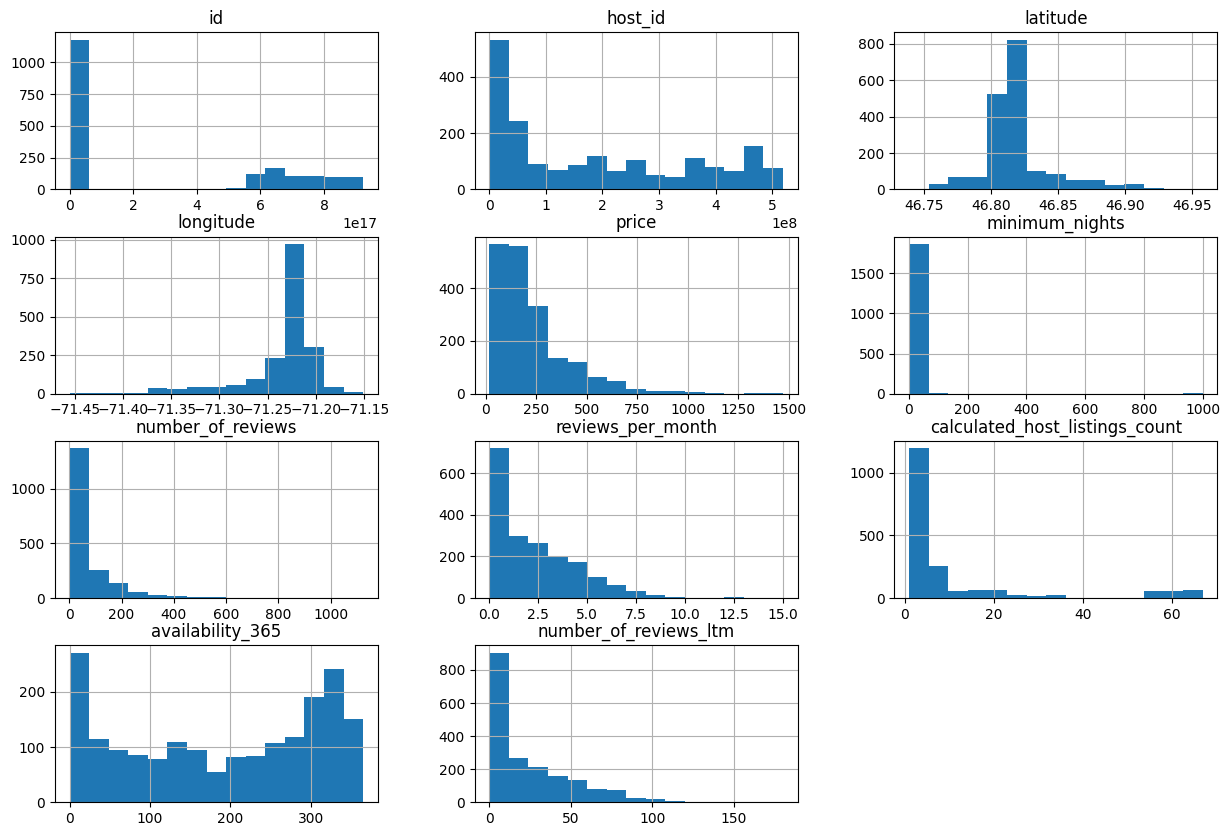

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Há presença de Outliers?**



Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price` e `minimum_nights`

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,228.721364,9.893980,65.949387,2.331257,10.618540,189.429941
std,187.782185,42.905521,96.769708,2.178857,17.799207,122.345530
min,17.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,103.000000,1.000000,8.000000,0.490000,1.000000,71.000000
50%,175.000000,2.000000,30.000000,1.710000,3.000000,206.000000
75%,285.000000,3.000000,83.000000,3.640000,8.000000,308.000000
max,1471.000000,1000.000000,1124.000000,15.000000,67.000000,365.000000


Olhando os dados acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 285, porém seu valor máximo é 1471.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

Vamos utilizar o gráfico Boxplot para visualizar se há presença de outliers nos dados.

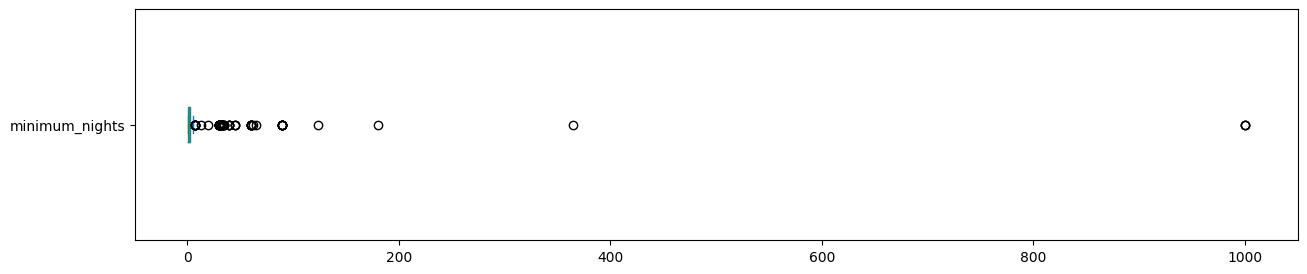

minimum_nights: valores acima de 30:
364 entradas
19.3926%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver a quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

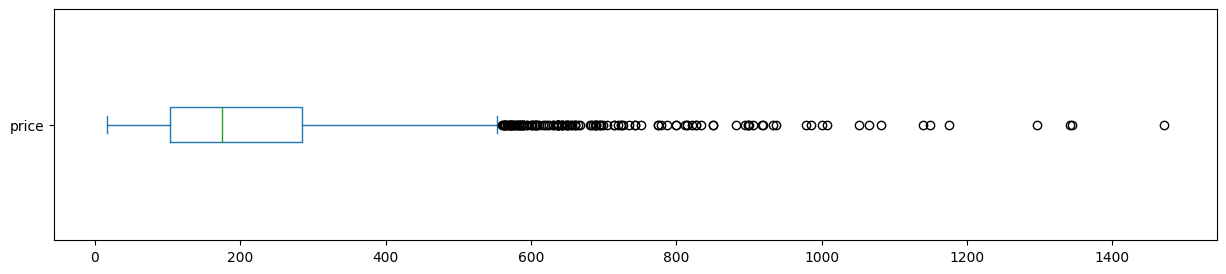


price: valores acima de 1000
11 entradas
0.5860%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver a quantidade de valores acima de 1000 para price
print("\nprice: valores acima de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))



# Removendo Outlier com método IQR
Neste projeto vamos utilizar o método Interquartile Range (IQR) para remover os outliers nas variáveis price e minimum_nights.

O IQR é a diferença da distribuição das variáveis entre o terceiro quartil e o primeiro quartil. Ele define um limite superior e um limite inferior, se o valor estiver 1,5 vezes acima do limite superior ou 1,5 vezes abaixo do limite inferior, é considerado um outilier.

In [ ]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)


IQR da variável price:  182.0
Limite superior de price:  558.0
Limite inferior de price:  -170.0


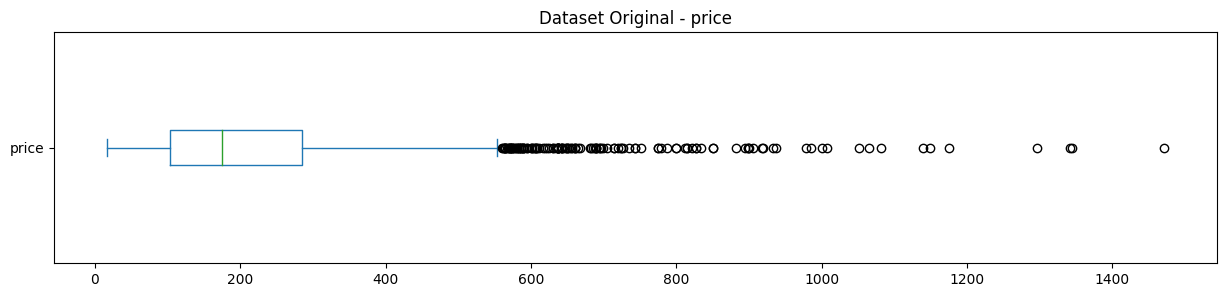

O dataset possui 1877 colunas
133 Entradas acima de 558
Representam 7.09% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 558".format(len(df[df.price > 558])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 558]) / df.shape[0])*100))

In [ ]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  2.0
Limite superior de minimum_nights:  6.0
Limite inferior de minimum_nights:  -2.0


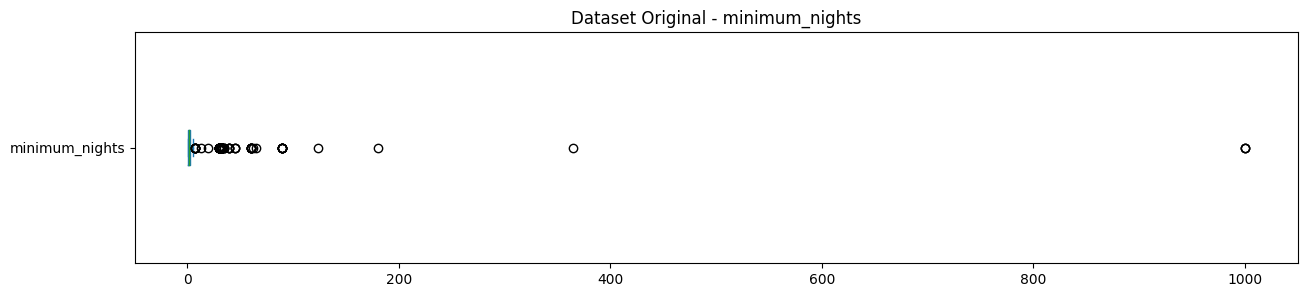

O dataset possui 1877 colunas
385 Entradas acima de 6
Representam 20.51% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 6".format(len(df[df.minimum_nights > 6])))
print("Representam {:.2f}% do dataset".format((len(df[df.minimum_nights > 6]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

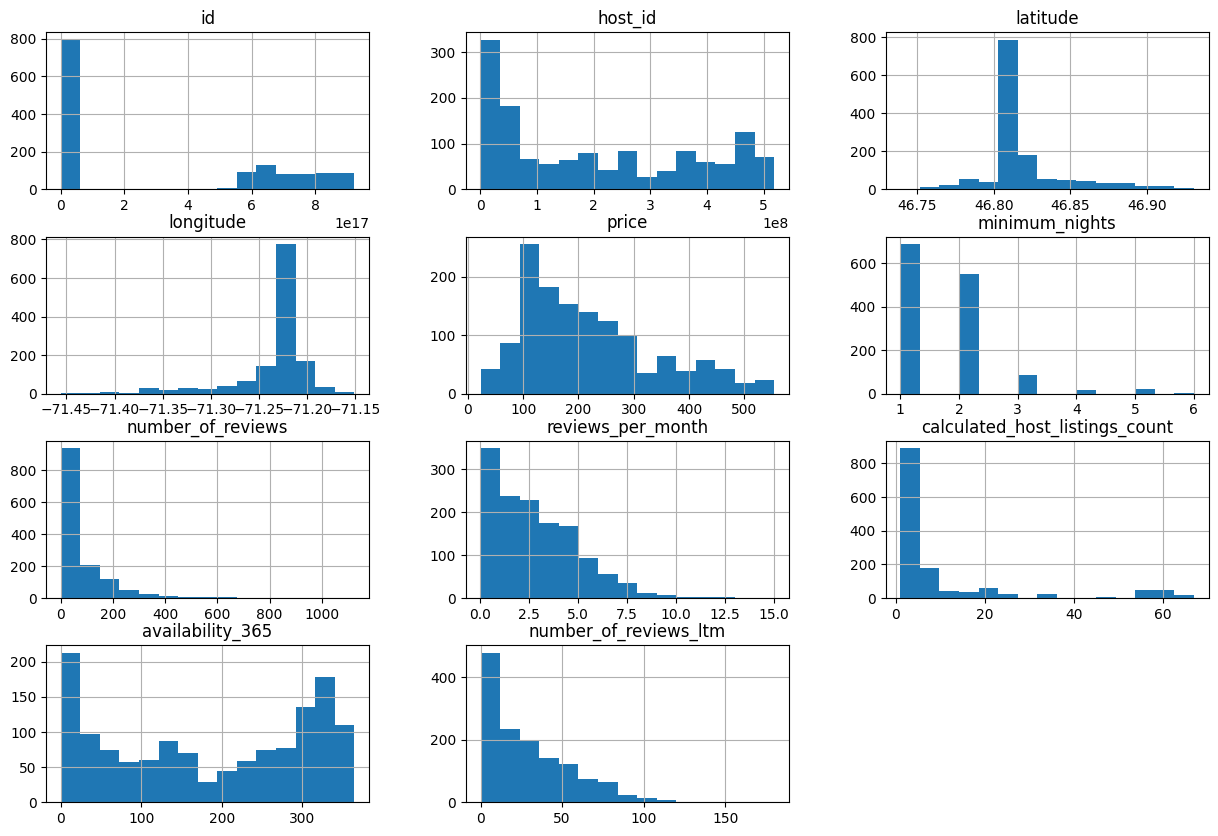

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 558].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 6].index, axis=0, inplace=True)


# plotar o histograma para as variáveis numérica
df_clean.hist(bins=15, figsize=(15,10));

In [ ]:
# verificando a distribuição estatistica dos dados limpos
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.366000e+03,1.366000e+03,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000
mean,3.049332e+17,2.036285e+08,46.820196,-71.236222,218.187408,1.641288,77.207174,2.822584,9.819912,183.986091,28.441435
std,3.665537e+17,1.726710e+08,0.026503,0.040972,119.719483,0.819287,105.616427,2.210315,16.436351,124.455222,26.168191
min,1.383810e+05,3.167050e+05,46.739160,-71.455880,23.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,3.441241e+07,3.577502e+07,46.810881,-71.234189,124.000000,1.000000,11.000000,1.000000,1.000000,58.000000,6.000000
50%,5.032211e+07,1.616109e+08,46.813630,-71.225545,190.000000,1.000000,38.000000,2.405000,3.000000,188.000000,21.500000
75%,6.766230e+17,3.717116e+08,46.822212,-71.218670,280.750000,2.000000,103.000000,4.260000,8.000000,309.000000,44.000000
max,9.230028e+17,5.186523e+08,46.930440,-71.150740,554.000000,6.000000,1124.000000,15.000000,67.000000,365.000000,180.000000


### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df_clean.price.median()

190.0

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews',
                 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.059804,-0.129172,0.209625,0.174429
minimum_nights,0.059804,1.000000,-0.166996,-0.137436,-0.184549
number_of_reviews,-0.129172,-0.166996,1.000000,-0.108711,-0.054341
calculated_host_listings_count,0.209625,-0.137436,-0.108711,1.000000,0.346855
availability_365,0.174429,-0.184549,-0.054341,0.346855,1.000000


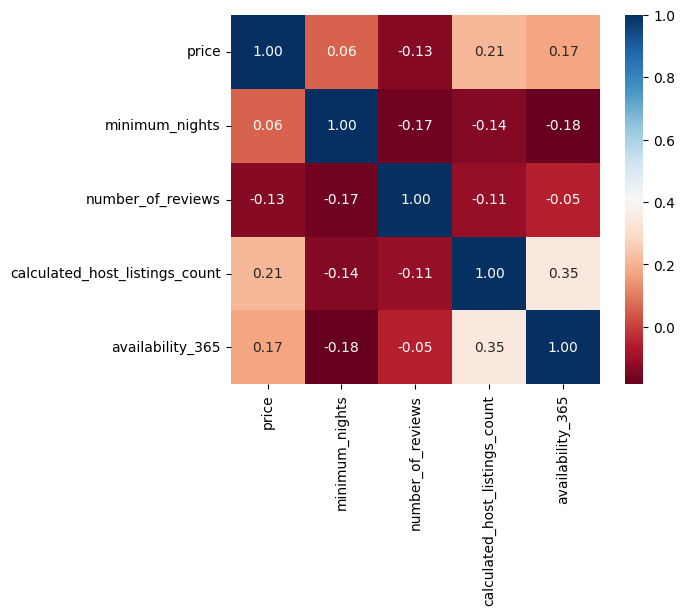

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

O heatmap ou mapa de calor gerado acima, é utilizado para identificar correlações entre as variáveis.
Como os dados são simplificados nessa análise, não foi possivel identificar correlações relevantes entre as variáveis através do heatmap.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    1167
Private room        169
Hotel room           17
Shared room          13
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0] * 100

Entire home/apt    62.173681
Private room        9.003729
Hotel room          0.905701
Shared room         0.692595
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Pointe-de-Sainte-Foy                            463.000000
Vieux-Québec/Cap-Blanc/Colline parlementaire    288.381643
Saint-Jean-Baptiste                             249.134328
Quartier 4-6                                    246.200000
Saint-Roch                                      234.721785
Saint-Sacrement                                 222.687500
Quartier 5-2                                    220.000000
Cap-Rouge                                       220.000000
Saint-Sauveur                                   209.904762
Montcalm                                        209.818182
Name: price, dtype: float64

In [ ]:
# ver quantidade de imóveis no Vieux-Québec/Cap-Blanc/Colline parlementaire
print(df_clean[df_clean.neighbourhood == "Pointe-de-Sainte-Foy"].shape)

# ver as 3 entradas do Complexo do Vieux-Québec/Cap-Blanc/Colline parlementaire
df_clean[df_clean.neighbourhood == "Vieux-Québec/Cap-Blanc/Colline parlementaire"]

(1, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3,348647,Bed and breakfast in Quebec · ★4.74 · 1 bedroo...,1764323,Gilles,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.815040,-71.205620,Private room,225.0,1,176,1.28,2,75,17
4,361573,Bed and breakfast in Quebec · ★4.78 · 1 bedroo...,1764323,Gilles,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.815700,-71.205040,Private room,150.0,1,72,0.53,2,50,2
6,517628,Townhouse in Quebec · ★4.87 · 5 bedrooms · 5 b...,2216595,Jennifer,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.804320,-71.205590,Entire home/apt,459.0,3,30,0.63,1,49,8
24,1486117,Nature lodge in Quebec · ★4.40 · 1 bedroom · 2...,7927151,Denis,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.813860,-71.202010,Private room,190.0,2,178,1.48,7,46,23
25,1486498,Nature lodge in Quebec · ★4.64 · 1 bedroom · 1...,7927151,Denis,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.814080,-71.204550,Private room,210.0,2,220,1.90,7,40,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,899192485158951984,Rental unit in Québec · ★New · 1 bedroom · 1 b...,233022418,Alek,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.797390,-71.221202,Entire home/apt,141.0,2,2,2.00,1,312,2
2099,900187257804085812,Rental unit in Québec · ★5.0 · 2 bedrooms · 2 ...,467793070,David,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.805117,-71.217797,Entire home/apt,248.0,1,9,9.00,2,341,9
2100,900548210147862117,Rental unit in Québec · ★3.83 · 2 bedrooms · 2...,419586074,Cindy,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.813850,-71.207630,Entire home/apt,279.0,2,6,5.45,1,222,6
2144,918039159870466763,Rental unit in Québec · ★New · 2 bedrooms · 2 ...,284998802,Manoir,Vieux-Québec/Cap-Blanc/Colline parlementaire,46.811439,-71.210538,Entire home/apt,374.0,3,1,1.00,7,361,1


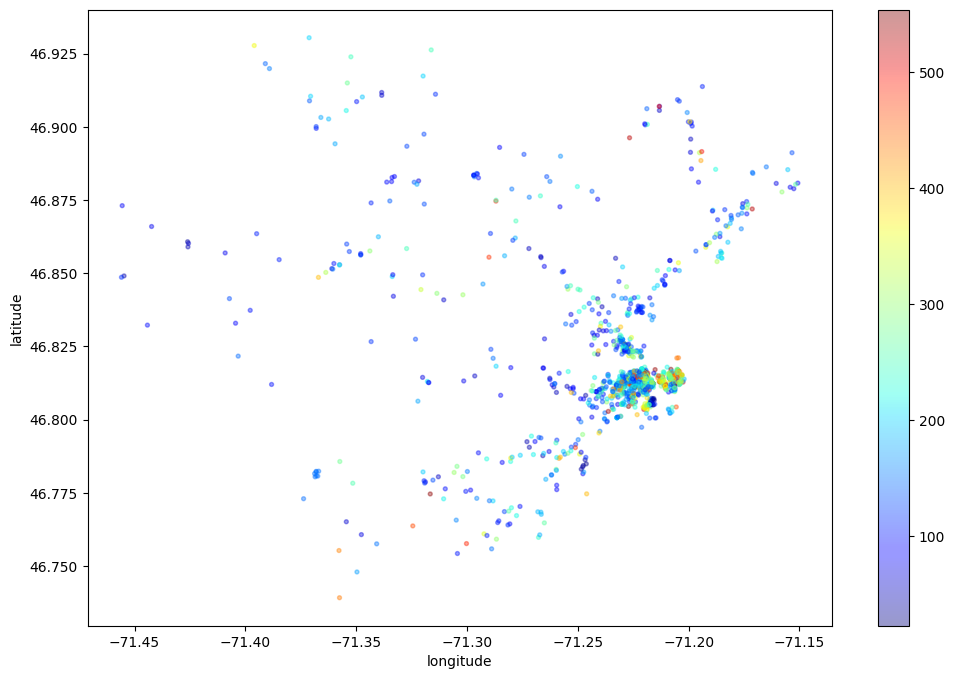

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
        cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.median()

1.0

## Conclusões

Foi feita uma análise mais superficial de dados disponibilizados pelo Airbnb na região de Quebec(Canadá). Com esses dados analisados, foram identificados presenças de outliers e realizado a limpeza dos dados.
Os dados apresentam que o tipo de imóvel mais alugado é casa inteira/apartamento com 62,17%, enquanto quartos privativos representam 9%.
Conforme os dados, a região mais cara é Pointe-de-Sainte-Foy.